In [ ]:
import nltk
nltk.download('punkt')
import re
from statistics import mean,median
import matplotlib.pyplot as plt
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from wordcloud import WordCloud
from textblob_de import TextBlobDE
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
german_stop_words = stopwords.words('german')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
class ExploratoryAnalysis():
  def __init__(self,data):
    self.data = data
    # self.stop_words = STOPWORDS.union(set([
    #     "ein", "eine", "einen", "einer", "einem", "eines",  # indefinite articles
    #     "der", "die", "das", "dem", "den", "des", "dessen",  # definite articles
    #     "und", "oder", "aber", "doch", "nicht", "weder",  # conjunctions
    #     "wir", "ihr", "sie", "er", "sie", "es", "man",  # pronouns
    #     "sein", "haben", "werden",  # auxiliary verbs
    #     "wurde", "wurden",  # past tense
    #     "sich", "mich", "dich", "mir", "dir",  # reflexive pronouns
    #     "auch", "dann", "noch", "schon",
    #     "ich","uns","ist","wo","im","zum",
    #     # adverbs
    # ]))
    self.stop_words = stopwords.words('german')

  def tokenize_data(self):
    tokenized_data = []
    for i in self.data:
      if pd.isna(i):
        i = ""
      clean_text = re.sub(r'[.,!?]', '', i)
      tokens = nltk.word_tokenize(clean_text, language='german')
      tokenized_data.append(tokens)
    return tokenized_data


  def get_basic_statistics(self,tokenized_data,topics):
    sentence_length = [len(i) for i in tokenized_data]
    sentence_stats = {"total_records": len(tokenized_data),
                      "average_length": mean(sentence_length),
                      "min_length": min(sentence_length),
                      "max_length": max(sentence_length),
                      "median_length": median(sentence_length),
                      "No corrections/Blank":sentence_length.count(0)
                      }

    fig1 = plt.hist(sentence_length,range(min(sentence_length),max(sentence_length)+100),align="mid")
    plt.title('Sentence Length Distribution')
    plt.xlabel("Sentence length")
    plt.ylabel("Frequency")
    plt.savefig("SentenceLenghtHist.png")

    sentence_wo_sw = [[word for word in doc if word.lower() not in self.stop_words] for doc in tokenized_data]
    # Join sentence_wo_sw data into strings
    joined_data = [' '.join(tokens) for tokens in sentence_wo_sw]
    # Create WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(joined_data))
    # Plot WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud')
    plt.savefig("WordCloud.png")


    sentiments_dict = self.sentiment_analysis(tokenized_data)
    topics_dict = self.get_topics(tokenized_data,topics)

    with open("exploratory analysis.txt", "w") as file:
      file.write("Statistics:\n")
      for key, value in sentence_stats.items():
          file.write(f"{key}: {value}\n")
      file.write("\nSentiment Analysis:\n")
      for key, value in sentiments_dict.items():
          file.write(f"{key}: {value}\n")
      file.write("\nTopic modelling:\n")
      for key, value in topics_dict.items():
          file.write(f"{key}: {value}\n")

    return "Exploratory Analysis Report Generated! Check the output directory"

  def sentiment_analysis(self,tokenized_data):
    # Join tokenized data into strings
    documents = [' '.join(tokens) for tokens in tokenized_data]

    # Perform sentiment analysis and categorize sentences
    positive_count = 0
    negative_count = 0
    neutral_count = 0

    for doc in documents:
        blob = TextBlobDE(doc)
        polarity = blob.sentiment.polarity

        if polarity > 0.2:
            positive_count += 1
        elif polarity < -0.2:
            negative_count += 1
        else:
            neutral_count += 1

    sentiments_dict = {"Positive":positive_count,"Negative":negative_count,"Neutral":neutral_count}
    return sentiments_dict


  def get_topics(self,tokenized_data,topic_num):

    # Remove stop words and create dictionary
    dictionary = corpora.Dictionary([word for word in doc if word.lower() not in self.stop_words] for doc in tokenized_data)

    # Create a document-term matrix
    corpus = [dictionary.doc2bow(doc) for doc in tokenized_data]

    # Train the LDA model
    lda_model = models.LdaModel(corpus, num_topics=topic_num, id2word=dictionary, passes=10)

    # Store topics in a dictionary
    topics_dict = {}
    for idx, topic in lda_model.print_topics():
        topics_dict[idx] = topic

    return topics_dict


In [ ]:
# import pandas as pd

# # German sentences
# german_sentences = [
#     "Ich gehe gerne spazieren im Park.",
#     "Heute ist ein schöner Tag zum Entspannen.",
#     "Wo ist die nächste Apotheke?",
#     "Mein Lieblingsessen ist Pizza mit extra Käse.",
#     "Wir treffen uns morgen am Bahnhof.",
#     ""
# ]

# # Creating a dataframe
# df = pd.DataFrame()

# # Adding the German sentences as a column
# df['German'] = german_sentences

# # Displaying the dataframe
# print(df)


                                          German
0              Ich gehe gerne spazieren im Park.
1      Heute ist ein schöner Tag zum Entspannen.
2                   Wo ist die nächste Apotheke?
3  Mein Lieblingsessen ist Pizza mit extra Käse.
4             Wir treffen uns morgen am Bahnhof.
5                                               


In [ ]:
df = pd.read_csv("/content/clang8_de.tsv",sep='\t', on_bad_lines="skip")

'Exploratory Analysis Report Generated! Check the output directory'

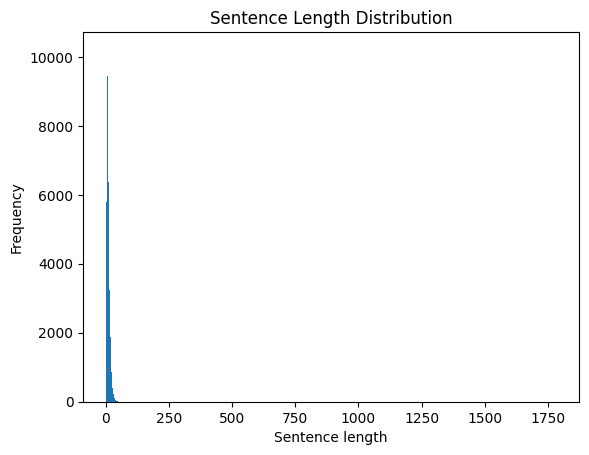

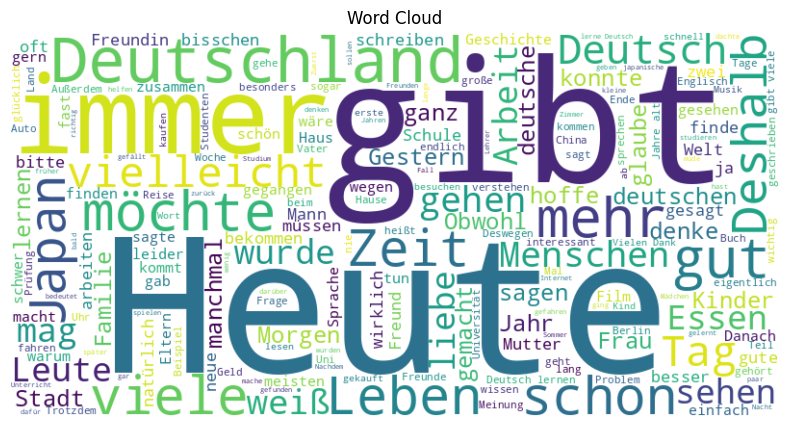

In [ ]:
exp = ExploratoryAnalysis(df['correction'])
tok = exp.tokenize_data()
exp.get_basic_statistics(tok,5)

In [ ]:
df_fm = pd.read_json('/content/train.json', lines=True)
#

In [ ]:
df_fm

,src_tokens,tgt_tokens,corrections
0,"[In, einem, vollkommenen, Welt, würde, es, sei...","[In, einer, vollkommenen, Welt, wäre, es, so, ...","[{'idx_src': [1], 'idx_tgt': [1], 'corr_type':..."
1,"[Dennoch, ist, das, sowohl, unmöglich, als, au...","[Dennoch, ist, das, sowohl, unmöglich, als, au...",[]
2,"[Auf, dem, ersten, Blick, sollte, man, glauben...","[Auf, den, ersten, Blick, sollte, man, glauben...","[{'idx_src': [1], 'idx_tgt': [1], 'corr_type':..."
3,"[Die, Leute, ,, dessen, Arbeit, wichtiger, für...","[Die, Leute, ,, deren, Arbeit, wichtiger, für,...","[{'idx_src': [3], 'idx_tgt': [3], 'corr_type':..."
4,"[Zum, Beispiel, spielen, Ärzte, ,, Lehrer, ,, ...","[Zum, Beispiel, spielen, Ärzte, ,, Lehrer, und...","[{'idx_src': [6], 'idx_tgt': [], 'corr_type': ..."
...,...,...,...
19232,"[Ich, habe, das, gehört, in, Istanbul, schöne,...","[Ich, habe, gehört, ,, dass, in, Istanbul, sch...","[{'idx_src': [2], 'idx_tgt': [], 'corr_type': ..."
19233,"[Wann, kann, ich, dich, besuchst, ?]","[Wann, kann, ich, dich, besuchen, ?]","[{'idx_src': [4], 'idx_tgt': [4], 'corr_type':..."
19234,"[Ich, habe, auch, im, andere, Land, Verwandten...","[Ich, habe, auch, im, anderen, Land, Verwandte...","[{'idx_src': [4], 'idx_tgt': [4], 'corr_type':..."
19235,"[Ja, dann, nochmal, ,, viel, ,, viel, ,, viel,...","[Ja, ,, dann, nochmal, ,, viele, ,, viele, ,, ...","[{'idx_src': [], 'idx_tgt': [1], 'corr_type': ..."


'Exploratory Analysis Report Generated! Check the output directory'

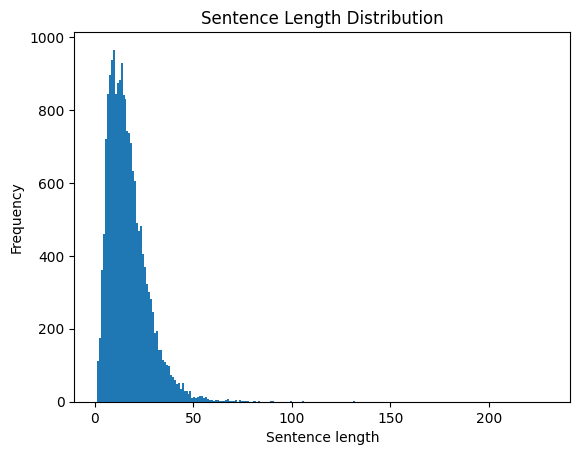

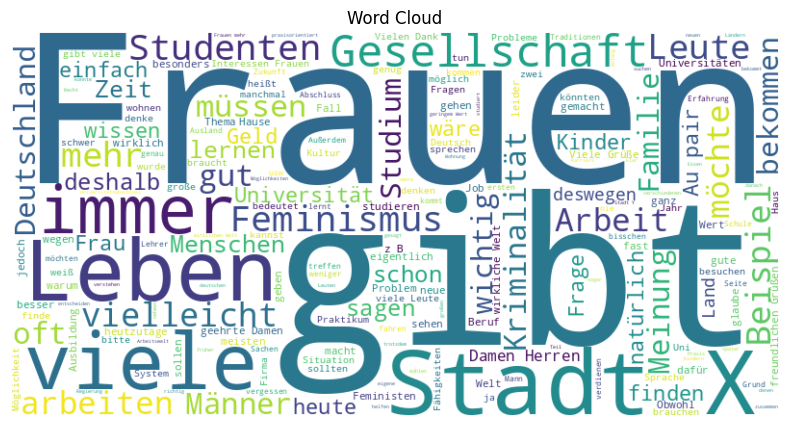

In [ ]:
exp = ExploratoryAnalysis(df_fm['tgt_tokens'])
#tok = exp.tokenize_data()
exp.get_basic_statistics(df_fm['tgt_tokens'],5)